<a href="https://colab.research.google.com/github/chancun2019/SVM-Machin-Learning/blob/main/Skripsi_3_Labelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from collections import OrderedDict
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json
import reprlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd 'drive/My Drive/Colab Notebooks/Output1'

/content/drive/My Drive/Colab Notebooks/Output1


In [4]:
data_anal = pd.read_csv("data_preproses clean.csv")

### Pelabelan dataset dengan InSet (Indonesian Sentiment Lexicon Based

In [5]:
# Memanfaatkan nltk VADER untuk menggunakan leksikon kustom
sia1A, sia1B, sia2 = SentimentIntensityAnalyzer(), SentimentIntensityAnalyzer(), SentimentIntensityAnalyzer()
# membersihkan leksikon VADER default
sia1A.lexicon.clear()
sia1B.lexicon.clear()
sia2.lexicon.clear()

# Membaca leksikon InSet
# Leksikon InSet lexicon dibagi menjadi dua, yakni polaritas negatif dan polaritas positif;
# kita akan menggunakan nilai compound saja untuk memberi label pada suatu kalimat
with open('_json_inset-neg.txt') as f:
    data1A = f.read()
with open('_json_inset-pos.txt') as f:
    data1B = f.read()

# Mengubah leksikon sebagai dictionary
insetNeg = json.loads(data1A)
insetPos = json.loads(data1B)

# Update leksikon VADER yang sudah 'dimodifikasi'
sia1A.lexicon.update(insetNeg)
sia1B.lexicon.update(insetPos)

print(reprlib.repr(sia1A.lexicon))
print(reprlib.repr(sia1B.lexicon))

{'(barang) bekas': -4, '(olahraga) bokser': -5, '(tua) uzur': -3, 'Anda': -4, ...}
{'(hujan) gerimis': 1, '(warna) dadu': 3, 'Ahad': 3, 'Sri paduka': 4, ...}


#### Contoh menggunakan kalimat untuk mencari polarity

In [6]:
sample = "lha siapa tahu kalau jadi kipi kalau tahu sakit pastinya gak vaksin"
print("insetNeg: ", sia1A.polarity_scores(sample))
print("insetPos: ", sia1B.polarity_scores(sample))
print("insetCpdSum: 'compound':", sia1A.polarity_scores(sample)["compound"] + sia1B.polarity_scores(sample)["compound"])

insetNeg:  {'neg': 0.839, 'neu': 0.161, 'pos': 0.0, 'compound': -0.9799}
insetPos:  {'neg': 0.0, 'neu': 0.364, 'pos': 0.636, 'compound': 0.9325}
insetCpdSum: 'compound': -0.0474


## Fungsi untuk mengklasifikasikan kalimat sebagai negatif/positif berdasarkan nilai compound


In [7]:
def is_positive_inset(tweet: str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise."""
    return sia1A.polarity_scores(tweet)["compound"] + sia1B.polarity_scores(tweet)["compound"] > 0

def is_positive_senti(tweet: str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise."""
    return sia2.polarity_scores(tweet)["compound"] > 0

In [8]:
# Membaca data yang sudah dibersihkan dari karakter yang tidak diperlukan serta dari daftar kata tak baku dan stop words
os.chdir("Output1")
base = "data_preproses clean.csv"

In [9]:
tweets = data_anal["tweet"].astype(str)

# Menulis hasil klasifikasi label untuk setiap kalimat berdasarkan nilai compound dari insetNeg dan insetPos
output = os.path.splitext(base)[0]+'-lb-inset.txt'
with open(output, 'w') as f:
    for tweet in tweets:
        if is_positive_inset(tweet) == True:
            label = "pos"
        else:
            label = "neg"
        f.write(str(label+'\n'))

# Menulis hasil klasifikasi label untuk setiap kalimat berdasarkan nilai compound dari SentiStrength
output = os.path.splitext(base)[0]+'-lb-senti.txt'
with open(output, 'w') as f:
    for tweet in tweets:
        if is_positive_senti(tweet) == True:
            label = "pos"
        else:
            label = "neg"
        f.write(str(label+'\n'))

### Distribusi kelas positif & negatif

In [10]:
lb_inset = 'data_preproses clean-lb-inset.txt'
#x0 = pd.read_csv(lb_actual, header=None,names=['text'], usecols=['label'])
x1 = pd.read_csv(lb_inset, header=None, names=['label'])

df = pd.DataFrame()
df.insert(0, 'InSet', x1['label'])
#
print(df)

    InSet
0     neg
1     neg
2     neg
3     neg
4     neg
..    ...
991   pos
992   neg
993   pos
994   neg
995   neg

[996 rows x 1 columns]


In [11]:
neg1 = df['InSet'].str.count('neg').sum()
pos1 = df['InSet'].str.count('pos').sum()
sum1 = neg1+pos1

print('negatives:',neg1,', positives:',pos1,', total:',sum1, '\t| inSet')

print('{:.2f}'.format(neg1/sum1*100),':', '{:.2f}'.format(pos1/sum1*100), '\t| inSet')

negatives: 635 , positives: 361 , total: 996 	| inSet
63.76 : 36.24 	| inSet


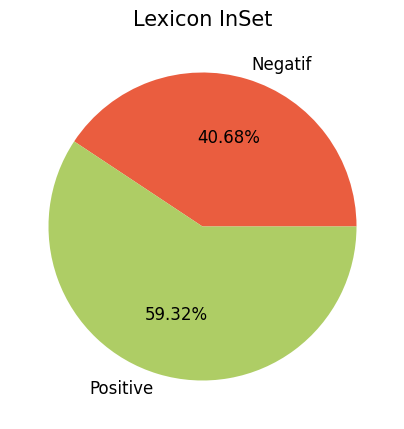

In [12]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Negatif', 'Positive'
sizes = [40.68, 59.32]
colors = ('#EA5D3F', '#AECD65')

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
ax.pie(sizes, labels = labels, autopct='%.2f%%', colors=colors, textprops={'fontsize': 12})
ax.set_title('Lexicon InSet', fontsize=15)
plt.show()